#**AdaBoost (Sklearn)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [2]:
# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Filter only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [3]:
def fit_and_evaluate_ada_boost(base_estimator, X_train, y_train, X_test, y_test):
    # Create and fit the AdaBoost model
    ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)
    ada_boost.fit(X_train, y_train)

    # Evaluate the model
    accuracy = ada_boost.score(X_test, y_test)

    # Make predictions on X_test
    predictions = ada_boost.predict(X_test)

    return ada_boost, accuracy, predictions  # Ensure three values are returned

In [4]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [5]:
# Collect accuracies for plotting
accuracies = []

# List of different base estimators to use with AdaBoost
base_estimators = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Ridge Regression", RidgeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Support Vector Machine", SVC(kernel='linear', probability=True)),
    ("Shallow Decision Tree", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier(n_estimators=10, max_depth=3)),
    ("Extra Trees", ExtraTreesClassifier(n_estimators=10, max_depth=3))
]

Logistic Regression Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Logistic Regression Accuracy: 1.00


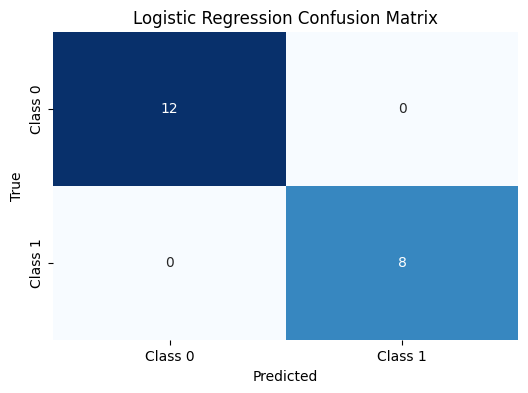

Ridge Regression Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Ridge Regression Accuracy: 1.00


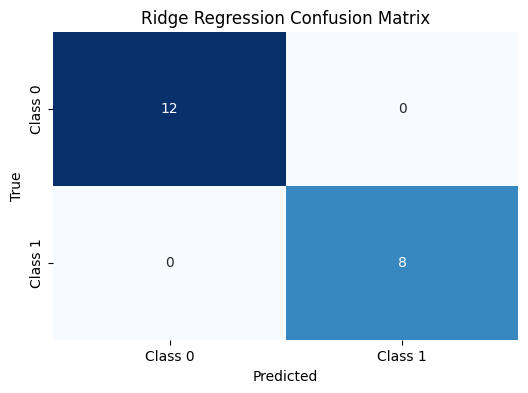

Naive Bayes Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Naive Bayes Accuracy: 1.00


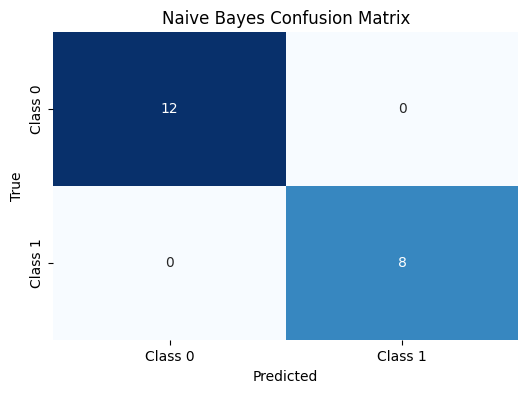

Support Vector Machine Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Support Vector Machine Accuracy: 1.00


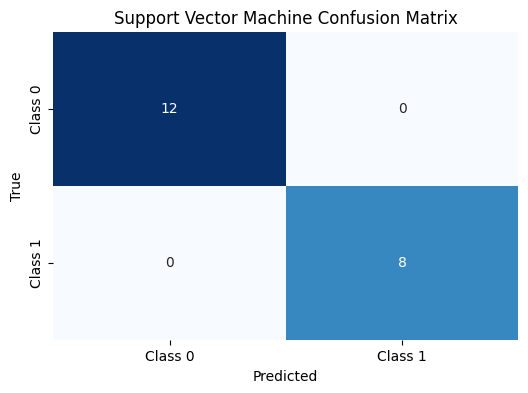

Shallow Decision Tree Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Shallow Decision Tree Accuracy: 1.00


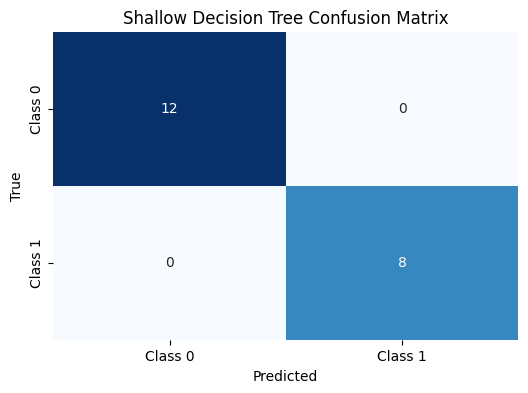

Random Forest Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Random Forest Accuracy: 1.00


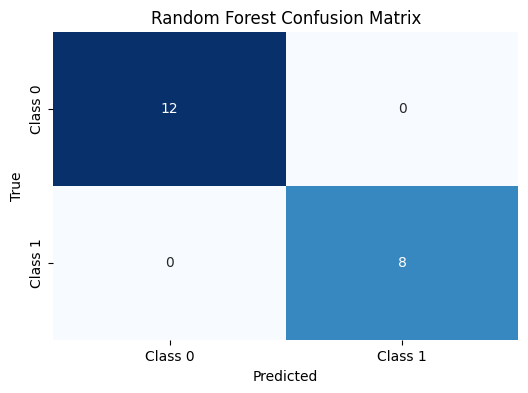

Extra Trees Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Extra Trees Accuracy: 1.00


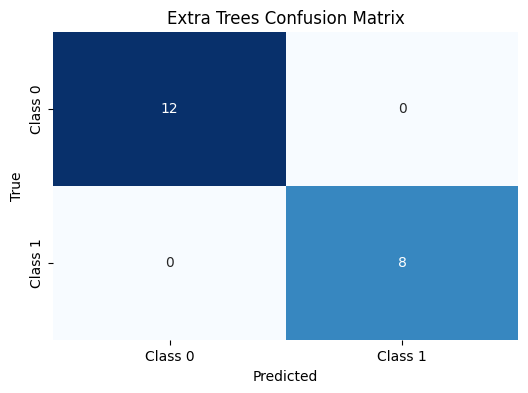

In [6]:
# Evaluate each base estimator and visualize predictions
for name, estimator in base_estimators:
    ada_boost_model, accuracy, predictions = fit_and_evaluate_ada_boost(estimator, X_train, y_train, X_test, y_test)
    accuracies.append((name, accuracy))

    print(f"{name} Predictions: {predictions}")
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Plot confusion matrix
    plot_confusion_matrix(y_test, predictions, title=f'{name} Confusion Matrix')

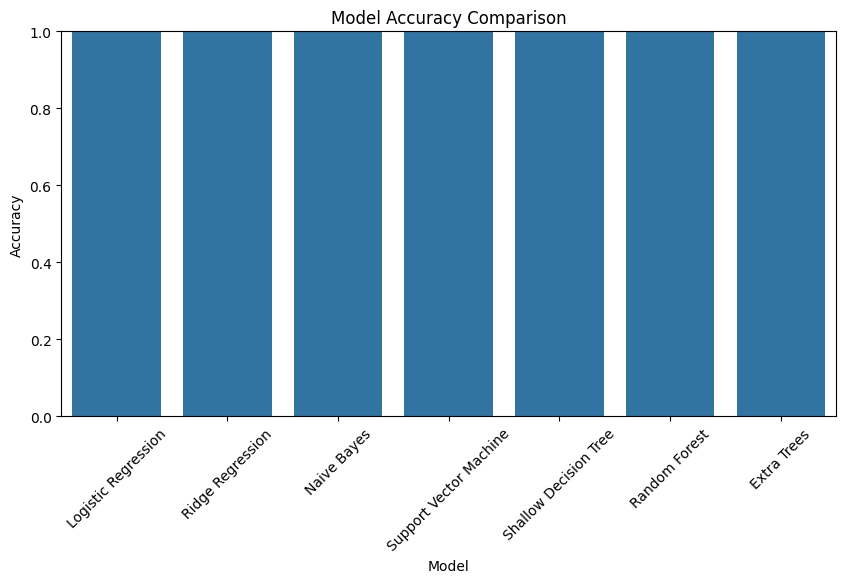

In [7]:
# Create a DataFrame for accuracy results
accuracy_df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])

# Plot the accuracy of each model
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits to 0-1
plt.show()

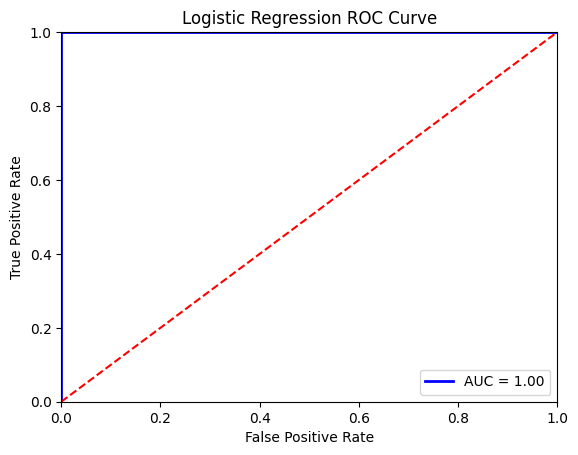

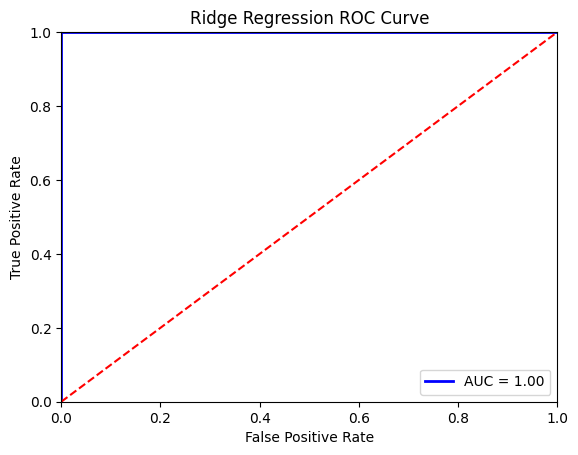

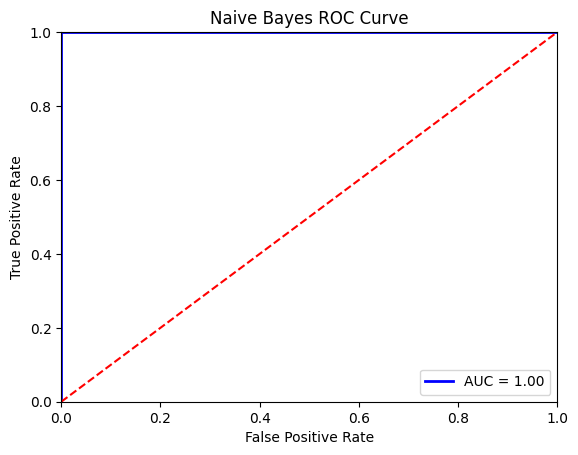

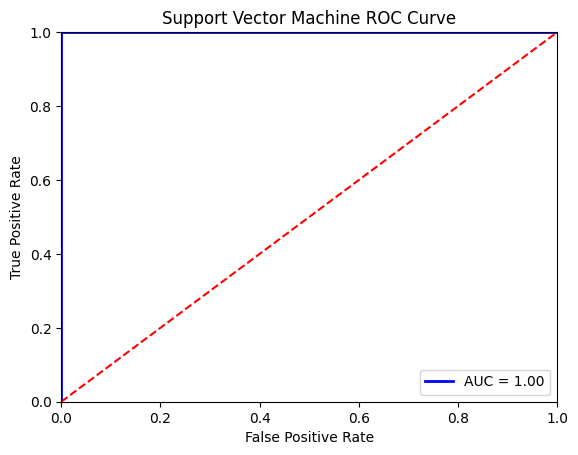

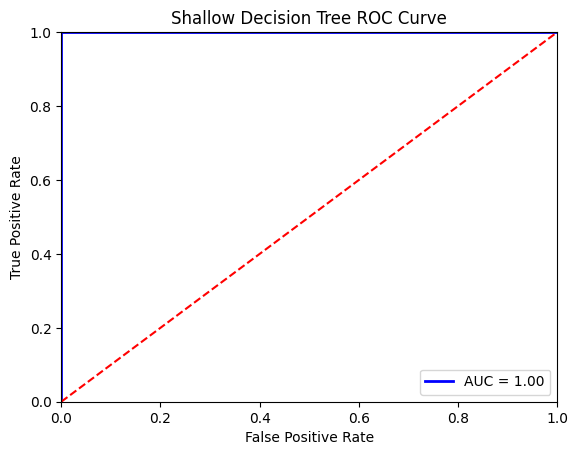

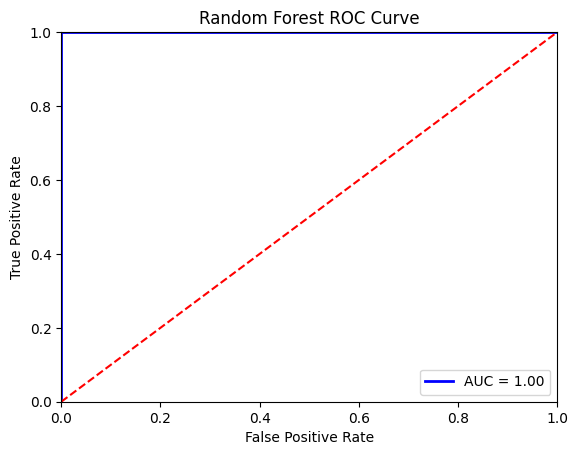

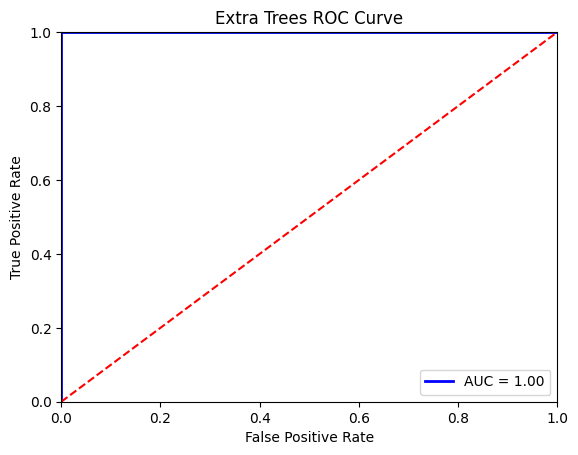

In [8]:
# Optional: Plot ROC Curve
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Evaluate each base estimator and visualize ROC curve
for name, estimator in base_estimators:
    ada_boost_model, accuracy, predictions = fit_and_evaluate_ada_boost(estimator, X_train, y_train, X_test, y_test)

    # Calculate probability scores for ROC using the fitted ada_boost_model
    if hasattr(ada_boost_model, "predict_proba"):
        y_scores = ada_boost_model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_scores, title=f'{name} ROC Curve')